#### Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Load and understand data

In [73]:
# Loading Dataset
df_train = pd.read_csv("Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")
df_test = pd.read_csv("Uniqlo(FastRetailing) 2017 Test - stocks2017.csv")

# check first five rows of the data
df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [75]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# index the data with date
df_train.index = df_train['Date']
df_test.index = df_test['Date']

# Check first five rows of the data
df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,,
2016-12-30,2016-12-30,42120,42330,41700,41830,610000,25628028000
2016-12-29,2016-12-29,43000,43220,42540,42660,448400,19188227000
2016-12-28,2016-12-28,43940,43970,43270,43270,339900,14780670000
2016-12-27,2016-12-27,43140,43700,43140,43620,400100,17427993000
2016-12-26,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [4]:
# displaying full dataset
pd.set_option('display.max_rows', None)     

display(df_train)

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000
5,2016-12-22,43660,43840,43190,43480,381600,16586491000
6,2016-12-21,43900,44370,43610,44000,658900,28994316000
7,2016-12-20,42910,43630,42860,43620,499400,21606102000
8,2016-12-19,42790,43150,42740,43130,358700,15428531000
9,2016-12-16,43350,43550,42810,43130,542000,23380606000


### Exploratory Data Analysis

In [28]:
# shape of the dataset
print("Shape of the train dataset is:", df_train.shape)
print("Shape of the test dataset is:", df_test.shape)

Shape of the train dataset is: (1126, 15)
Shape of the test dataset is: (7, 7)


In [29]:
# checking info of dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 99 to 1224
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1126 non-null   object 
 1   Open                        1126 non-null   int64  
 2   High                        1126 non-null   int64  
 3   Low                         1126 non-null   int64  
 4   Close                       1126 non-null   int64  
 5   Volume                      1126 non-null   int64  
 6   Stock Trading               1126 non-null   int64  
 7   Moving_Average              1126 non-null   float64
 8   PriceDifference             1126 non-null   float64
 9   ReturnPrice                 1126 non-null   float64
 10  Daily Return                1126 non-null   float64
 11  MovingAverage for 10 days   1126 non-null   float64
 12  MovingAverage for 20 days   1126 non-null   float64
 13  MovingAverage for 100 days  1126

In [30]:
# Checking null values
df_train.isnull().sum()  

Date                          0
Open                          0
High                          0
Low                           0
Close                         0
Volume                        0
Stock Trading                 0
Moving_Average                0
PriceDifference               0
ReturnPrice                   0
Daily Return                  0
MovingAverage for 10 days     0
MovingAverage for 20 days     0
MovingAverage for 100 days    0
Close First Difference        0
dtype: int64

In [31]:
# Checking statistical properties of data
df_train.describe()

,Open,High,Low,Close,Volume,Stock Trading,Moving_Average,PriceDifference,ReturnPrice,Daily Return,MovingAverage for 10 days,MovingAverage for 20 days,MovingAverage for 100 days,Close First Difference
count,1126.000000,1126.000000,1126.000000,1126.000000,1.126000e+03,1.126000e+03,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000
mean,33443.530195,33871.305506,33037.690941,33454.160746,7.330595e+05,2.438366e+10,33905.438011,-19.342806,-0.000551,-0.000573,33546.075488,33643.298401,34329.281261,-20.284192
std,11166.716453,11297.384582,11042.584100,11169.983393,4.213192e+05,1.554636e+10,10575.211364,839.052833,0.024261,0.024278,11055.880022,10932.580576,10012.341475,839.715327
min,13720.000000,13840.000000,13600.000000,13800.000000,1.391000e+05,3.966140e+09,15861.800000,-5000.000000,-0.153092,-0.153092,14521.000000,14773.500000,16766.200000,-5000.000000
25%,25202.500000,25542.500000,25057.500000,25372.500000,4.918250e+05,1.416489e+10,28854.725000,-440.000000,-0.013918,-0.014133,26775.875000,27466.875000,30660.325000,-440.000000
50%,33950.000000,34400.000000,33600.000000,34037.500000,6.328500e+05,2.151833e+10,34212.000000,-30.000000,-0.001111,-0.001111,34055.500000,34116.750000,34360.850000,-30.000000
75%,41837.500000,42567.500000,41425.000000,41932.500000,8.326750e+05,3.032245e+10,40608.500000,373.750000,0.012166,0.012166,42005.375000,40742.062500,40053.200000,373.750000
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11,56162.800000,4740.000000,0.145810,0.145810,59961.000000,58419.500000,52858.800000,4740.000000


### Data visualization

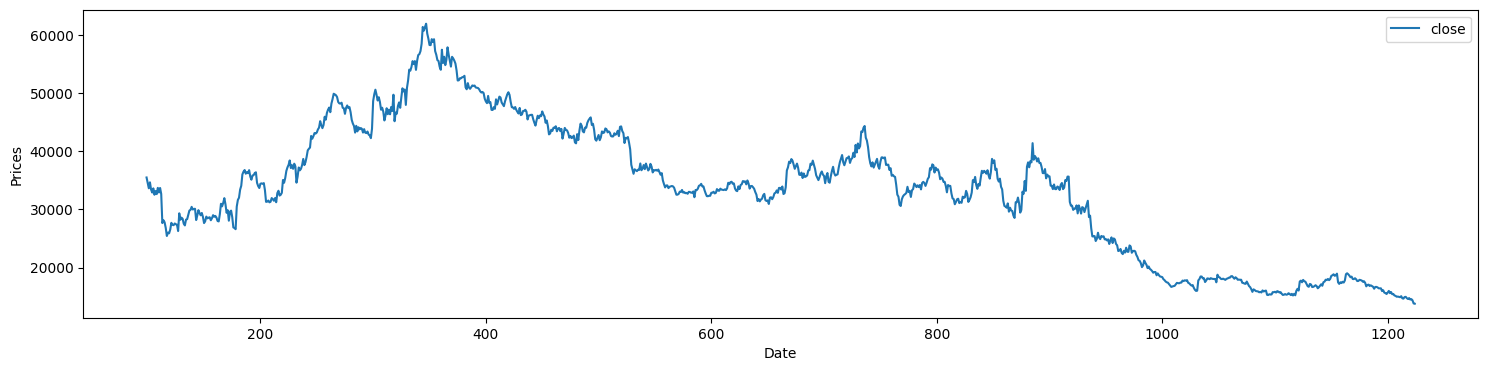

In [32]:
# Plotting distribution for Close
plt.figure(figsize=(18,4))
df_train['Close'].plot(label='close')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()


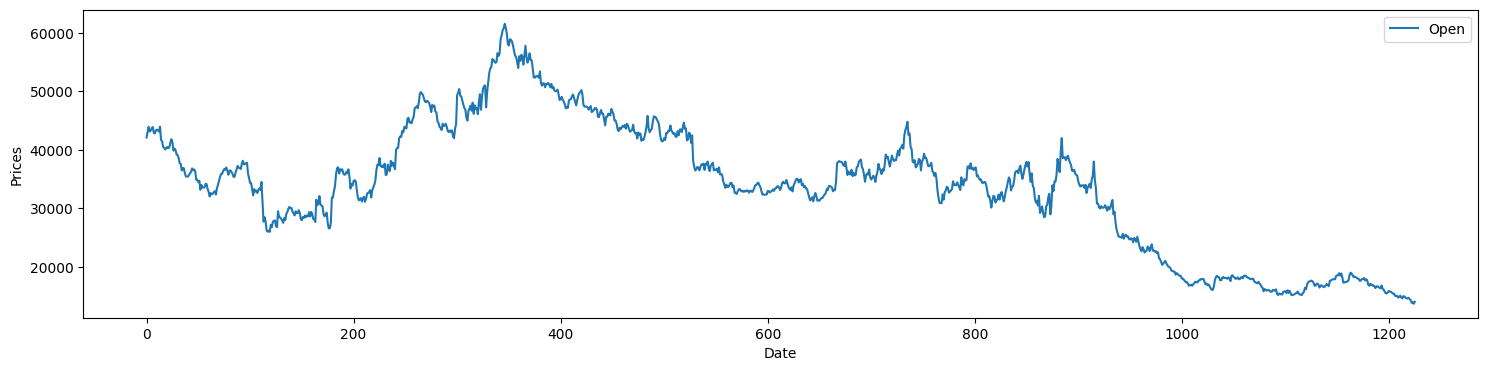

In [10]:
# Plotting distribution for Open
plt.figure(figsize=(18,4))
df_train['Open'].plot(label='Open')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

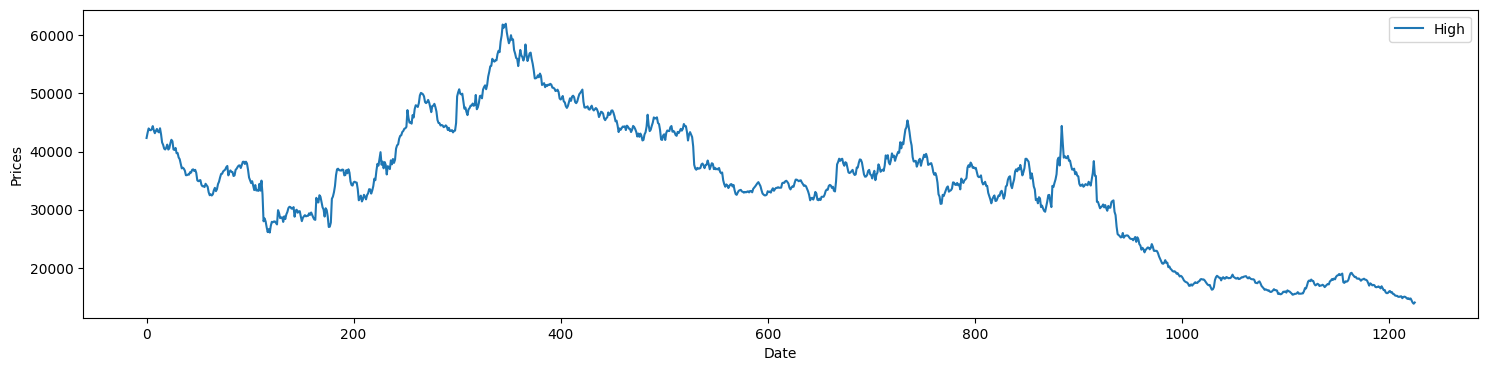

In [11]:
# Plotting distribution for High
plt.figure(figsize=(18,4))
df_train['High'].plot(label='High')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

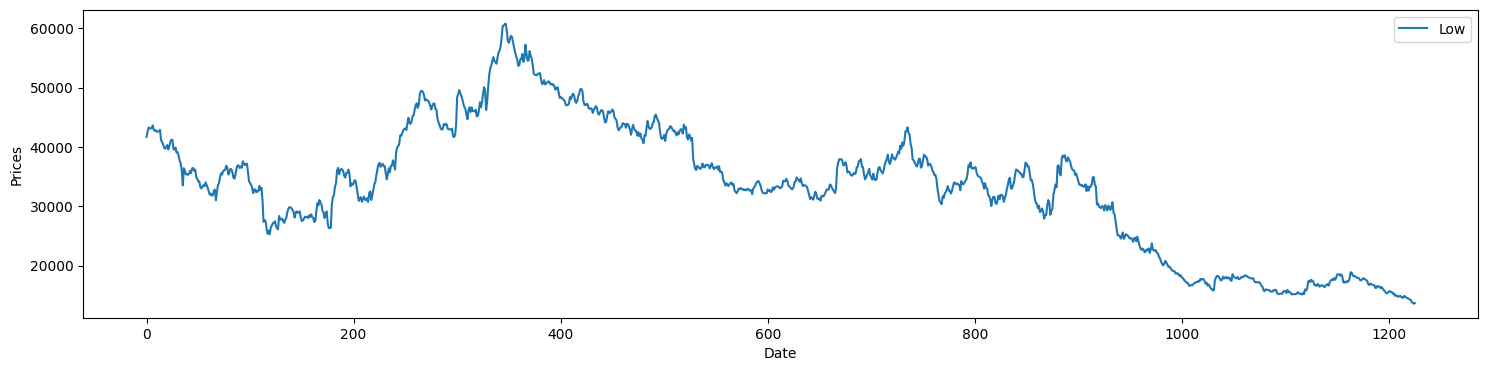

In [12]:
# Plotting distribution for Low
plt.figure(figsize=(18,4))
df_train['Low'].plot(label='Low')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

<AxesSubplot: >

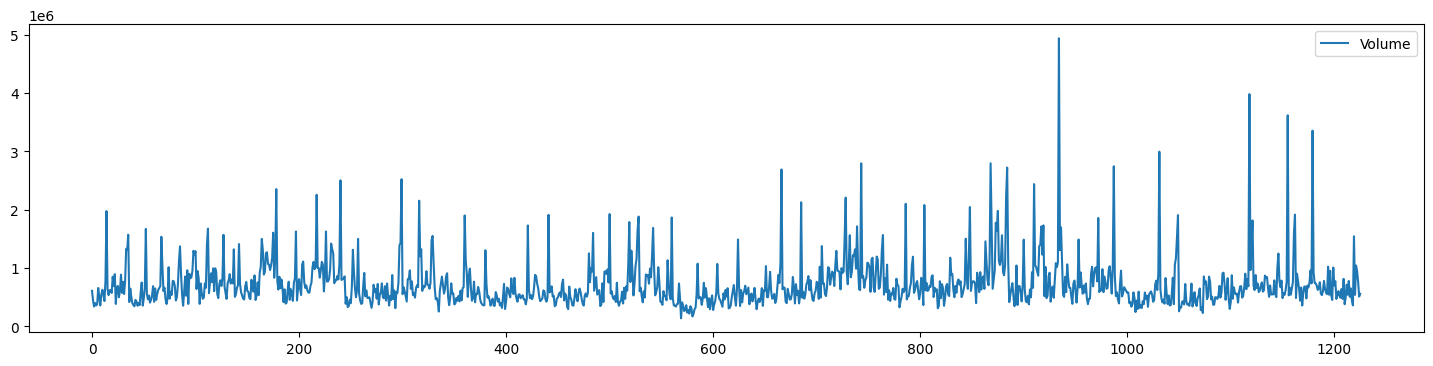

In [13]:
df_train['Volume'].plot(legend=True, figsize=(18,4))

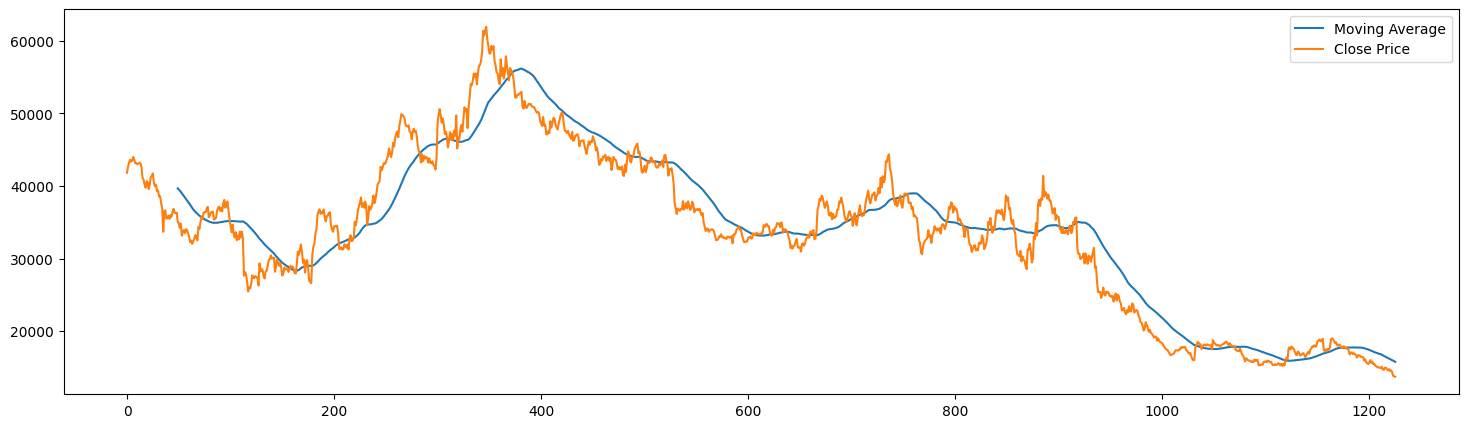

In [14]:
df_train['Moving_Average'] = df_train['Close'].rolling(50).mean()
#plot the moving average
plt.figure(figsize=(18, 5))
df_train['Moving_Average'].plot(label='Moving Average')
df_train['Close'].plot(label='Close Price')
plt.legend()
plt.show()

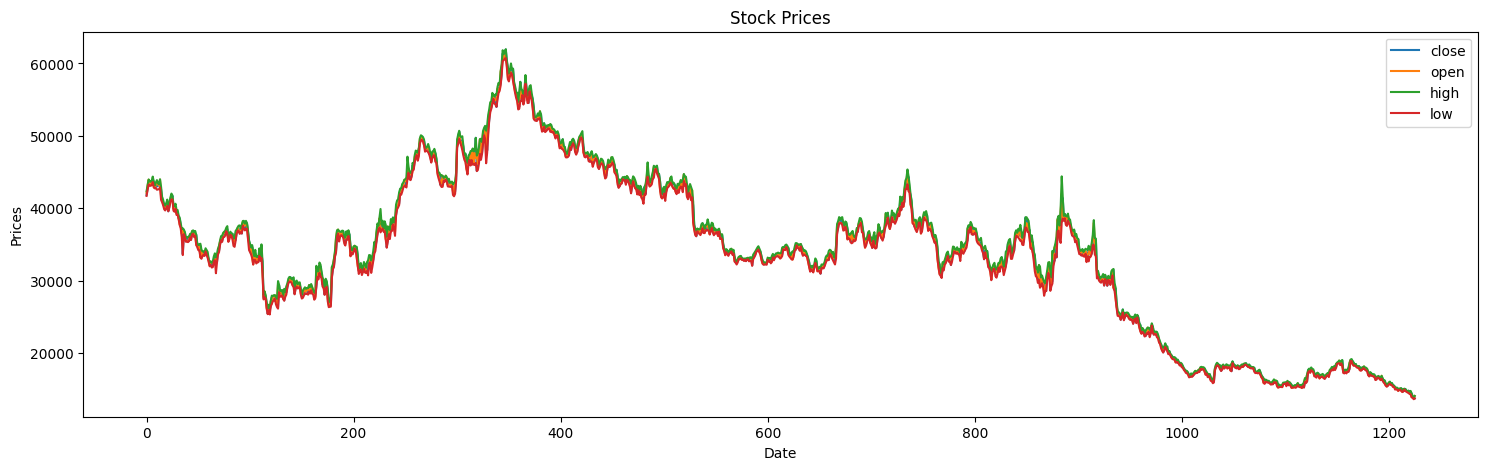

In [15]:
# Multiline plot for Close, Open, High and Low
plt.subplots(figsize=(18,5))
plt.xlabel('Date')
plt.ylabel('Prices')
df_train['Close'].plot(label='close')
df_train['Open'].plot(label='open')
df_train['High'].plot(label='high')
df_train['Low'].plot(label='low')
plt.legend()
plt.title('Stock Prices')
plt.show()

Text(0.5, 1.0, 'Price Return')

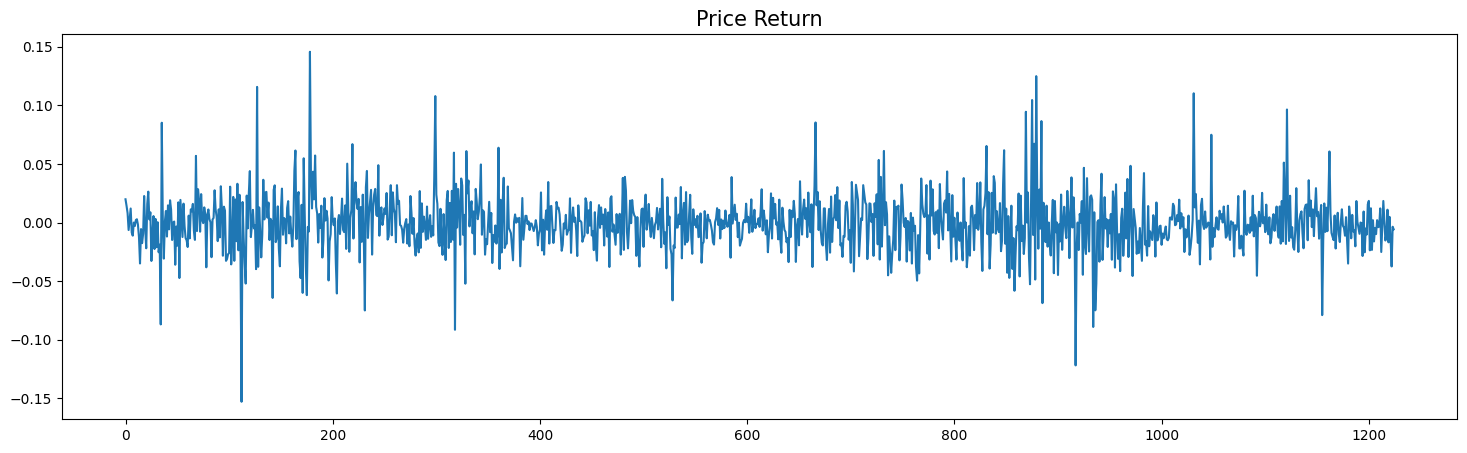

In [16]:
# Price Returen 
df_train['PriceDifference'] = df_train['Close'].shift(-1) - df_train['Close']
df_train['ReturnPrice'] = df_train['PriceDifference'] /df_train['Close']
df_train['ReturnPrice'].plot(figsize=(18,5))
plt.title('Price Return', size = 15)

<AxesSubplot: >

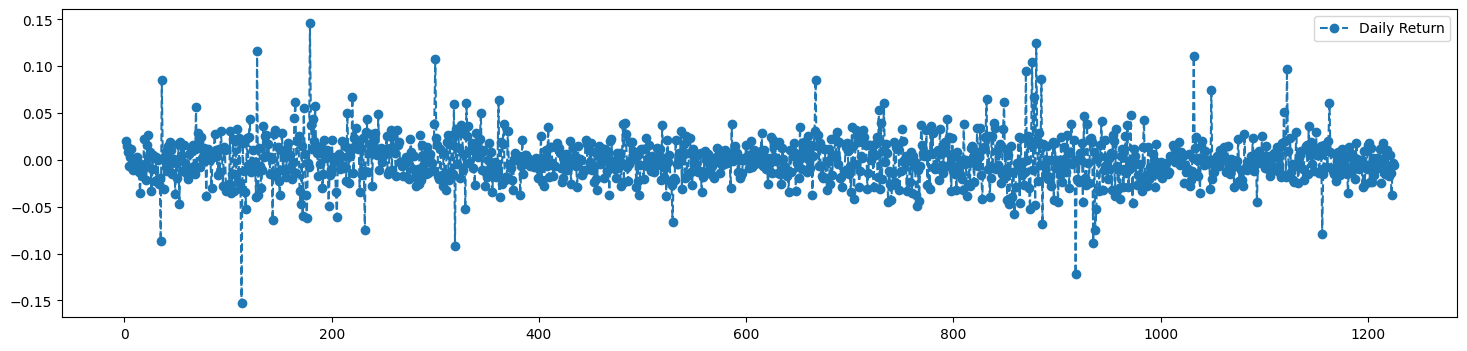

In [17]:
# pct_change is used to find the percent change for each day
df_train['Daily Return'] = df_train['Close'].pct_change()

# Lets plot the daily return percentage
df_train['Daily Return'].plot(figsize=(18,4), legend=True, linestyle='--', marker='o')

<AxesSubplot: >

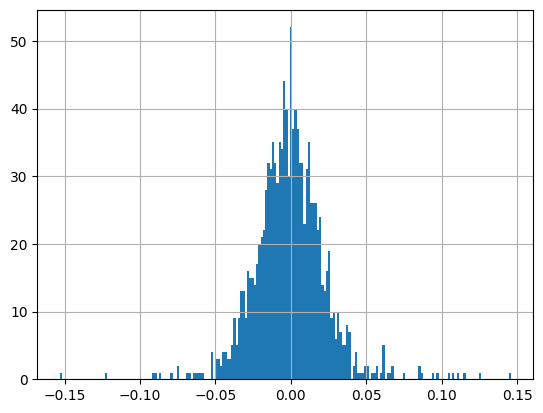

In [18]:
df_train['Daily Return'].hist(bins=200)

<AxesSubplot: xlabel='Daily Return', ylabel='Density'>

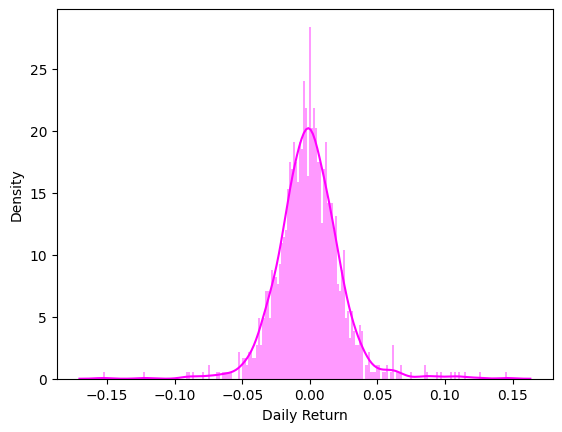

In [19]:
sns.distplot(df_train['Daily Return'].dropna(), bins=200, color='magenta')

In [33]:
# Plotting several moving averages
MovingAverage_day = [10,20,100]

for ma in MovingAverage_day:
    column_name = 'MovingAverage for %s days' %(str(ma))
    df_train[column_name] = df_train['Close'].rolling(ma).mean()

<AxesSubplot: >

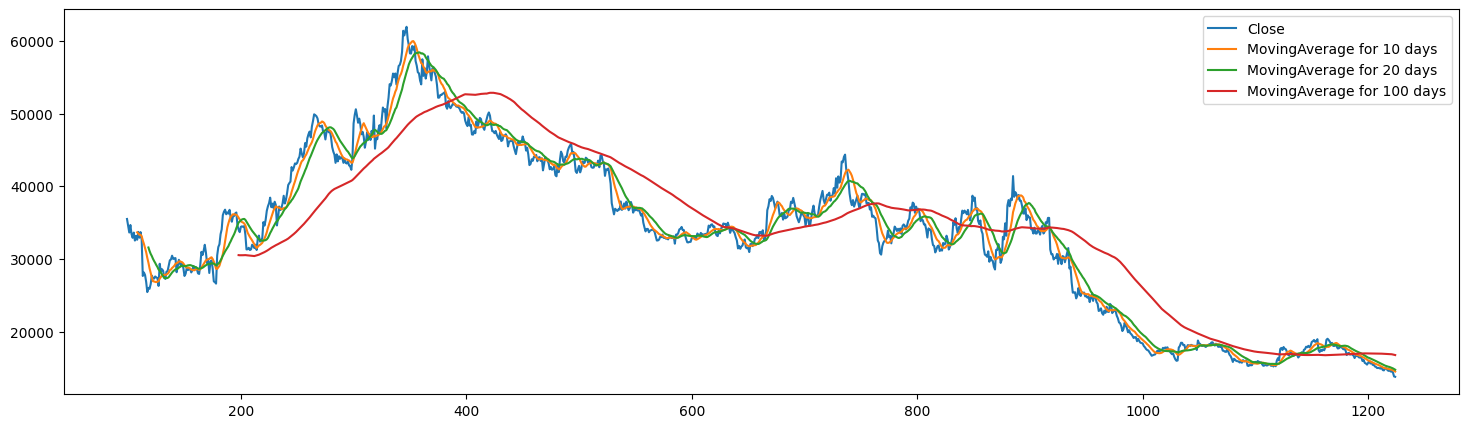

In [34]:
df_train[['Close','MovingAverage for 10 days','MovingAverage for 20 days','MovingAverage for 100 days']].plot(subplots=False,figsize=(18,5))

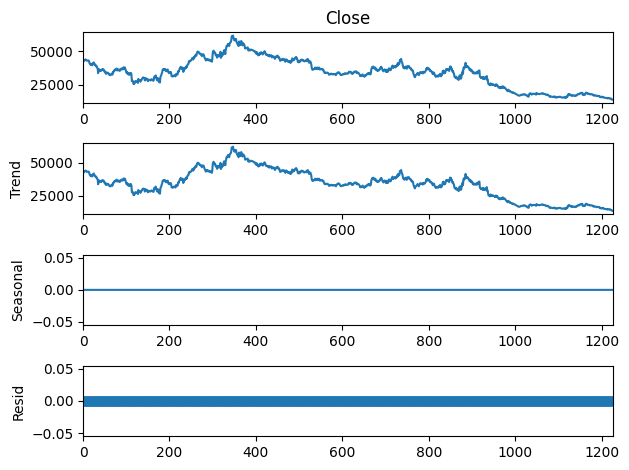

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_train['Close'], model='additive',period = 1)
result.plot()
plt.show()

In [35]:
#  Function to check stationary of data using ADF(Augmented Dickey-Fuller(adfuller))
from statsmodels.tsa.stattools import adfuller
def adfuller_test(Close):
  result=adfuller(Close)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
  for value,label in zip(result,labels):
      print(label+' : '+str(value) )

  if result[1] <= 0.05:
      print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
  else:
      print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [36]:
adfuller_test(df_train["Close"])

ADF Test Statistic : -0.611216471343593
p-value : 0.8684273684600722
#Lags Used : 2
Number of Observations : 1123
weak evidence against null hypothesis,indicating it is non-stationary 


In [26]:
# Convert the data to stationary form
df_train['Close First Difference'] = df_train["Close"] - df_train["Close"].shift(1)
df_train.dropna(inplace = True)
df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading,Moving_Average,PriceDifference,ReturnPrice,Daily Return,MovingAverage for 10 days,MovingAverage for 20 days,MovingAverage for 100 days,Close First Difference
99,2016-08-04,35200,35530,34210,35500,1224800,43052588000,35190.6,-960.0,-0.027042,-0.031114,37026.0,36628.5,37428.7,-1140.0
100,2016-08-03,34340,35080,33900,34540,1288600,44487561000,35183.4,-900.0,-0.026057,-0.027042,36824.0,36558.5,37355.8,-960.0
101,2016-08-02,34330,34580,33610,33640,640000,21847347000,35172.0,1030.0,0.030618,-0.026057,36491.0,36423.5,37265.6,-900.0
102,2016-08-01,33300,34900,33110,34670,947300,32604467000,35169.4,-1240.0,-0.035766,0.030618,36308.0,36335.0,37179.6,1030.0
103,2016-07-29,32230,34150,32210,33430,827000,27331777000,35175.0,-520.0,-0.015555,-0.035766,35888.0,36184.0,37077.7,-1240.0


In [27]:
adfuller_test(df_train['Close First Difference'].dropna())

ADF Test Statistic : -23.012814101336104
p-value : 0.0
#Lags Used : 1
Number of Observations : 1124
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


##### Checking randomness in data

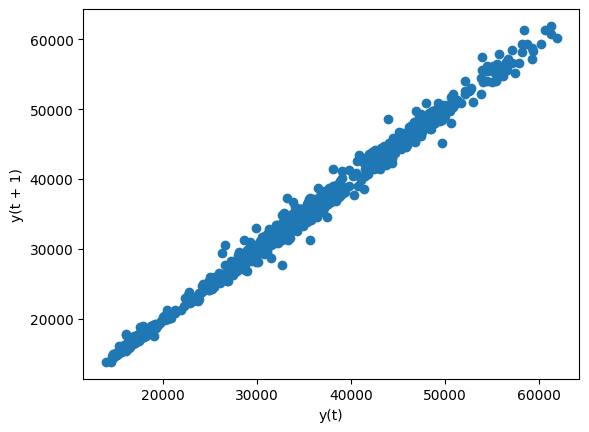

In [38]:
# Lag plot
from pandas.plotting import lag_plot
lag_plot(df_train['Close'])
plt.show() 

###### Previous day data and current day data is linearly related

##### Autocorrelation and partial autocorrelation plot

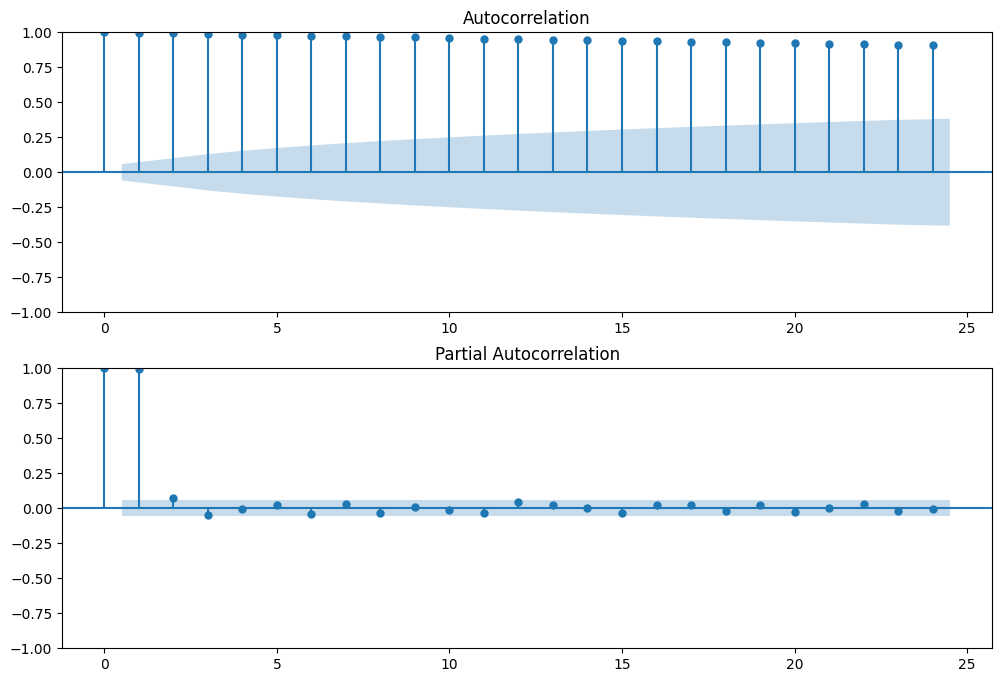

In [47]:
# non stationary original data
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_train['Close'].dropna(),lags=24,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_train['Close'].dropna(),lags=24,ax=ax2)




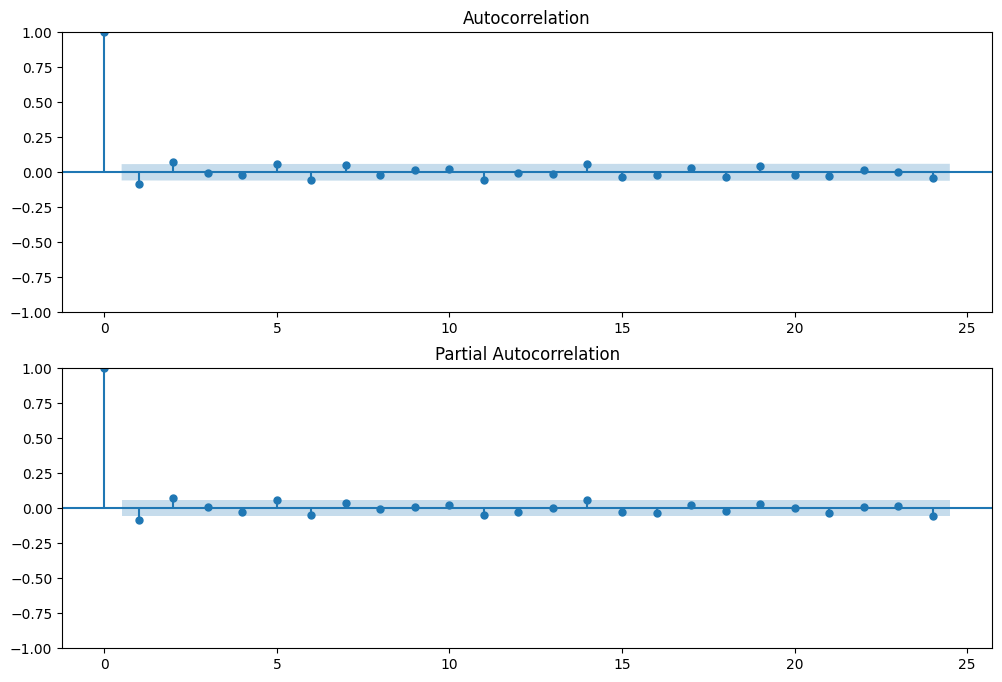

In [48]:
# stationary data

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_train['Close First Difference'].dropna(),lags=24,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_train['Close First Difference'].dropna(),lags=24,ax=ax2)

#### Arima model


In [51]:
# ARIMA model
from pmdarima import auto_arima


In [76]:
df_1= df_train.copy()
df_1.dropna(inplace=True)

In [77]:
df = df_1.Close


In [78]:
df.head()

Date
2016-12-30    41830
2016-12-29    42660
2016-12-28    43270
2016-12-27    43620
2016-12-26    43340
Name: Close, dtype: int64

In [79]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False)

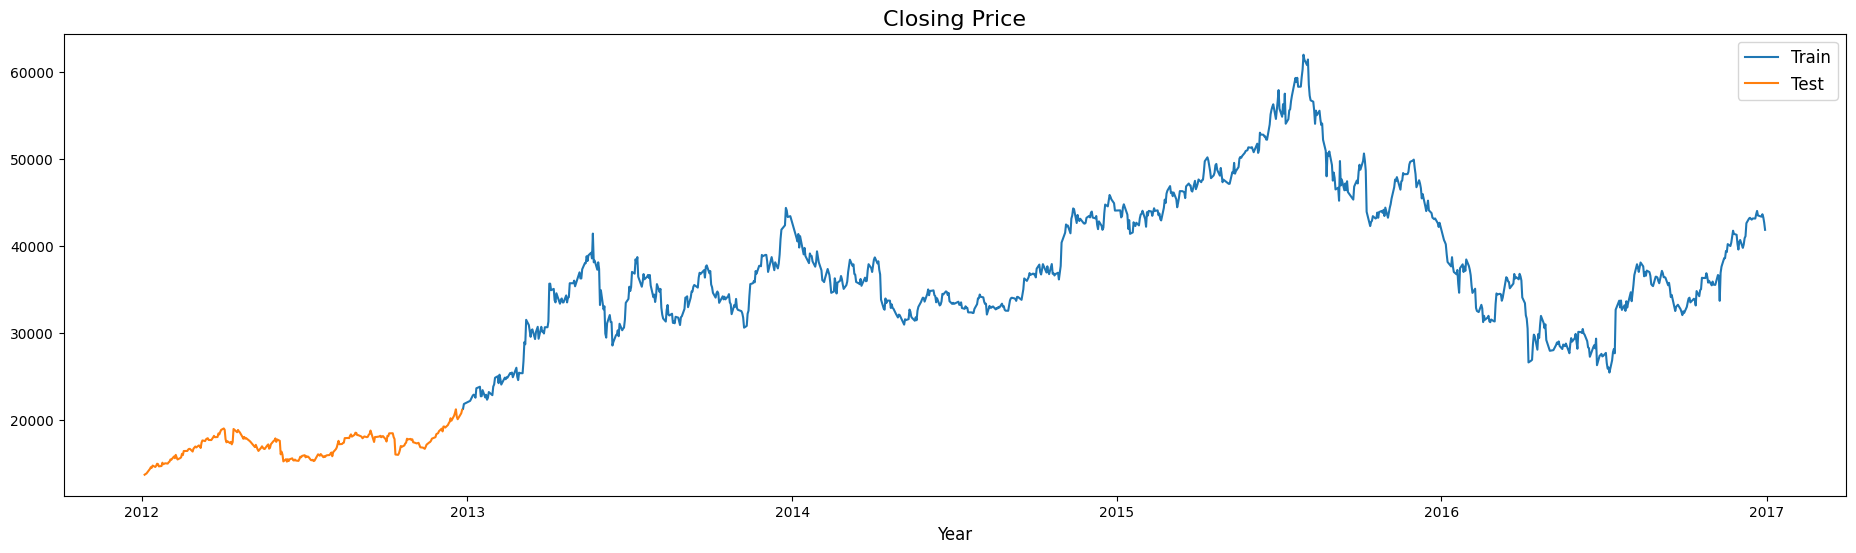

In [80]:
fig, ax = plt.subplots(figsize=(23, 6))
ax.plot(df_train, label='Train')
ax.plot(df_test, label='Test')
ax.set_xlabel('Year', fontsize=12)
ax.set_title('Closing Price', fontsize=16)
ax.legend(fontsize=12)

In [81]:
# Fitting the model
model = auto_arima(df_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df_train)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16139.706, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16140.571, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16139.331, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16139.692, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16139.084, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16139.345, Time=0.36 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.498 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [84]:
# Forecasting the data
forecast = model.predict(n_periods=len(df_test))
forecast = pd.DataFrame(forecast,index = df_test.index,columns=['Prediction'])



C:\Users\Hussain\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


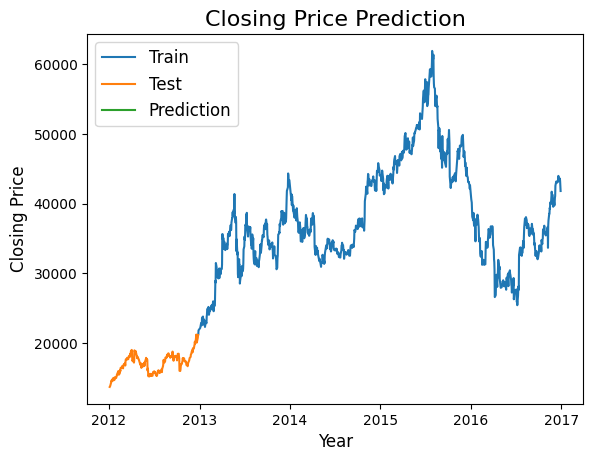

In [85]:
# Plotting the predictions
plt.plot(df_train, label='Train')
plt.plot(df_test, label='Test')
plt.plot(forecast, label='Prediction')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.title('Closing Price Prediction', fontsize=16)
plt.legend(fontsize=12)
plt.show()

